In [7]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib notebook

In [8]:
#Reading the initial dataset
nation = pd.read_csv('nationdaily.csv')
nation1 = nation.copy(deep=True)
nation1 = nation1.dropna()
#nation1

## Levitt-Metric for Total Cases

<IPython.core.display.Javascript object>


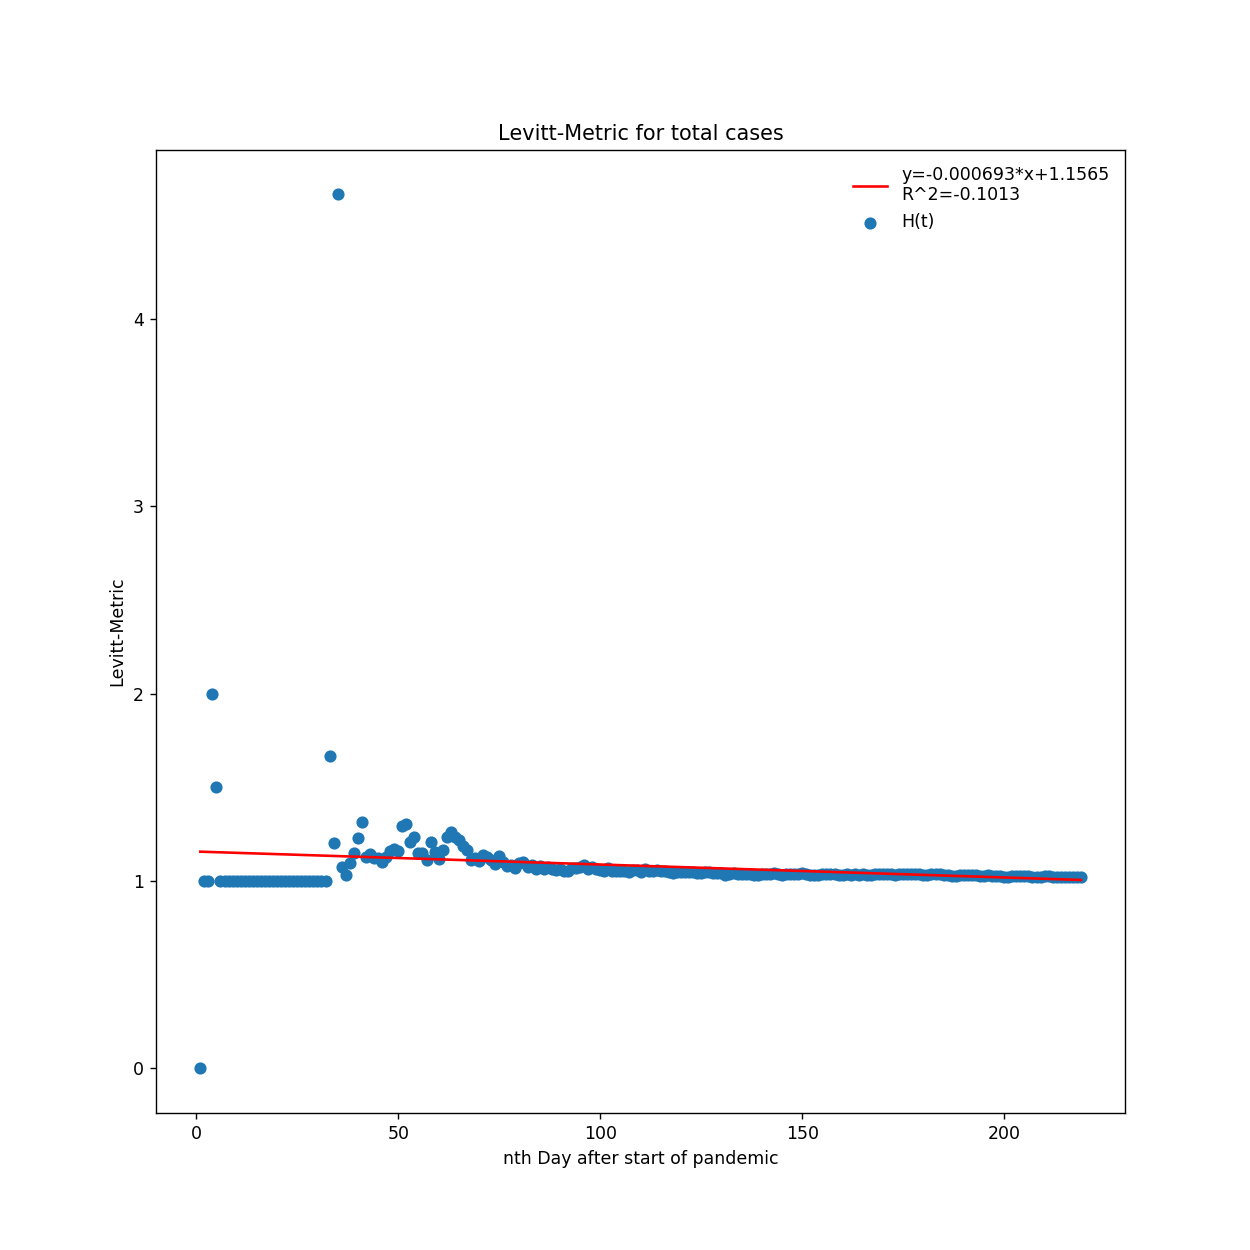

Pandemic will end in another 7 days!!!


In [9]:
#Computing Levitt-Metrics for the total cases
nation1['day'] = [ind+1 for ind in nation1.index]
levcase = [nation1['Total Confirmed'][i]/nation1['Total Confirmed'][i-1] for i in list(nation1.index)[1:]]
levcase.insert(0,None)
nation1['LevittCases'] = levcase
#print(nation1)

#Eliminate missing values
nation1['LevittCases'] = nation1['LevittCases'].fillna(0)

#Splitting into X and y values
#nation1 = nation1.iloc[50:]
Xcase = nation1['day'].to_numpy().reshape(-1,1)
ycase = nation1['LevittCases'].to_numpy().reshape(-1,1)
linreg1 = LinearRegression().fit(Xcase,ycase)

#Separate Training and Test Set
X_train,X_test,y_train,y_test = train_test_split(Xcase,ycase,random_state=0,test_size=0.2)

#Plotting the model
fig1 = plt.figure(figsize=(10,10))
plt.scatter(Xcase,ycase,label='H(t)')
plt.plot(Xcase,linreg1.coef_*Xcase+linreg1.intercept_,'r-',
         label='y={:.6f}*x+{:.4f}\nR^2={:.4f}'.format(linreg1.coef_[0][0],linreg1.intercept_[0],linreg1.score(X_test,y_test)))
plt.xlabel('nth Day after start of pandemic');
plt.ylabel('Levitt-Metric');
plt.title('Levitt-Metric for total cases');
plt.legend(frameon=False);

#Calculating end time of Pandemic
end1 = (1-linreg1.intercept_)/linreg1.coef_
end1 = np.round(end1)
print("Pandemic will end in another {} days!!!".format(int(end1[0][0]-len(nation1))))

## Levitt-Metric for Deaths

C:\Users\vivna\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in longlong_scalars
  
C:\Users\vivna\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in longlong_scalars
  


<IPython.core.display.Javascript object>


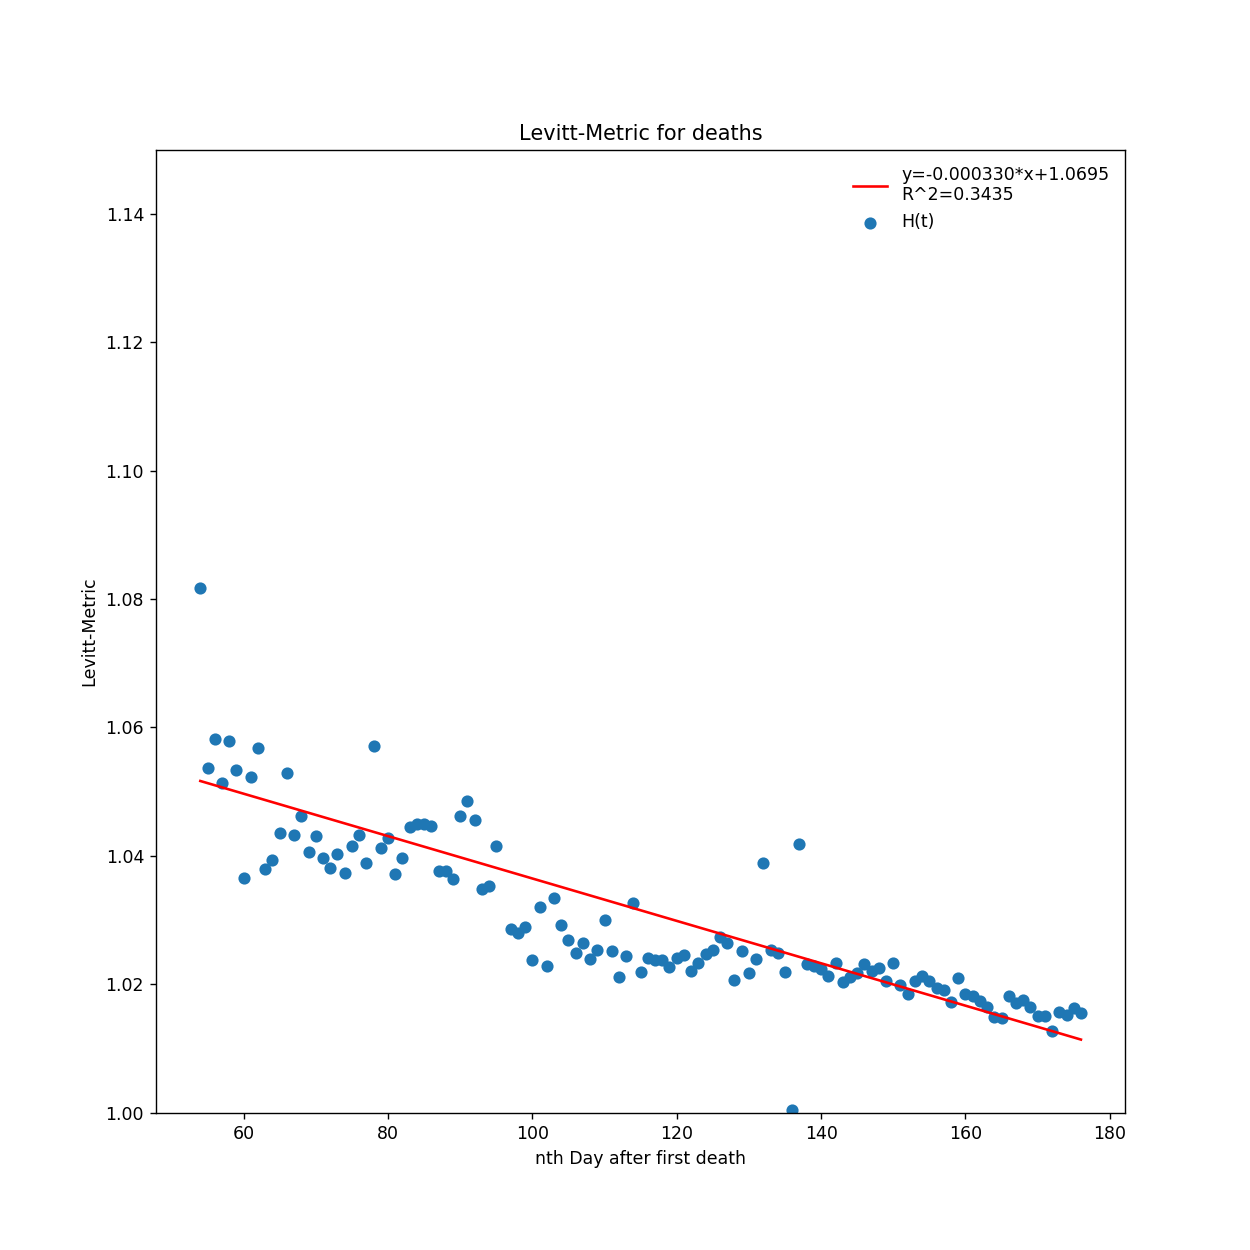

[[210.]]
Pandemic will end in another 34 days!!!


In [10]:
#Compute Levitt-Metric for Deaths
levdeath = [nation1['Total Deceased'][i]/nation1['Total Deceased'][i-1] for i in list(nation1.index)[1:]]
levdeath.insert(0,None)
nation1['LevittDeaths'] = levdeath

#Eliminate missing values
nation1['LevittDeaths'] = nation1['LevittDeaths'].fillna(0)

#Create a separate df process the data
deathlevitt = nation1.copy(deep=True)
deathlevitt = deathlevitt.replace([np.inf,-np.inf],0)
indexval = deathlevitt[(deathlevitt['LevittDeaths']==0)].index
deathlevitt.drop(indexval,inplace=True)
deathlevitt = deathlevitt.reset_index()
deathlevitt['day'] = [i+1 for i in deathlevitt.index]
deathlevitt = deathlevitt.iloc[53:]
deathlevitt = deathlevitt.reset_index()
deathlevitt = deathlevitt.drop(columns=['level_0','index'])

#Split into X and y data and fit a linear regression model
Xdeaths = deathlevitt['day'].to_numpy().reshape(-1,1)
ydeaths = deathlevitt['LevittDeaths'].to_numpy().reshape(-1,1)
linreg2 = LinearRegression().fit(Xdeaths,ydeaths)

#Plot the model
fig2 = plt.figure(figsize=(10,10))
plt.scatter(Xdeaths,ydeaths,label='H(t)')
plt.plot(Xdeaths,linreg2.coef_*Xdeaths+linreg2.intercept_,'r-',
         label='y={:.6f}*x+{:.4f}\nR^2={:.4f}'.format(linreg2.coef_[0][0],linreg2.intercept_[0],linreg2.score(Xdeaths,ydeaths)))
plt.xlabel('nth Day after first death');
plt.ylabel('Levitt-Metric');
plt.title('Levitt-Metric for deaths');
plt.legend(frameon=False);
plt.ylim((1,1.15))

#Predict end of pandemic
end2 = (1-linreg2.intercept_)/linreg2.coef_
end2 = np.round(end2)
print(end2)
print("Pandemic will end in another {} days!!!".format(int(end2[0]-deathlevitt['day'][len(deathlevitt)-1])))

## Levitt-Metric for Active Cases

C:\Users\vivna\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in longlong_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\vivna\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in longlong_scalars
  # This is added back by InteractiveShellApp.init_path()


<IPython.core.display.Javascript object>


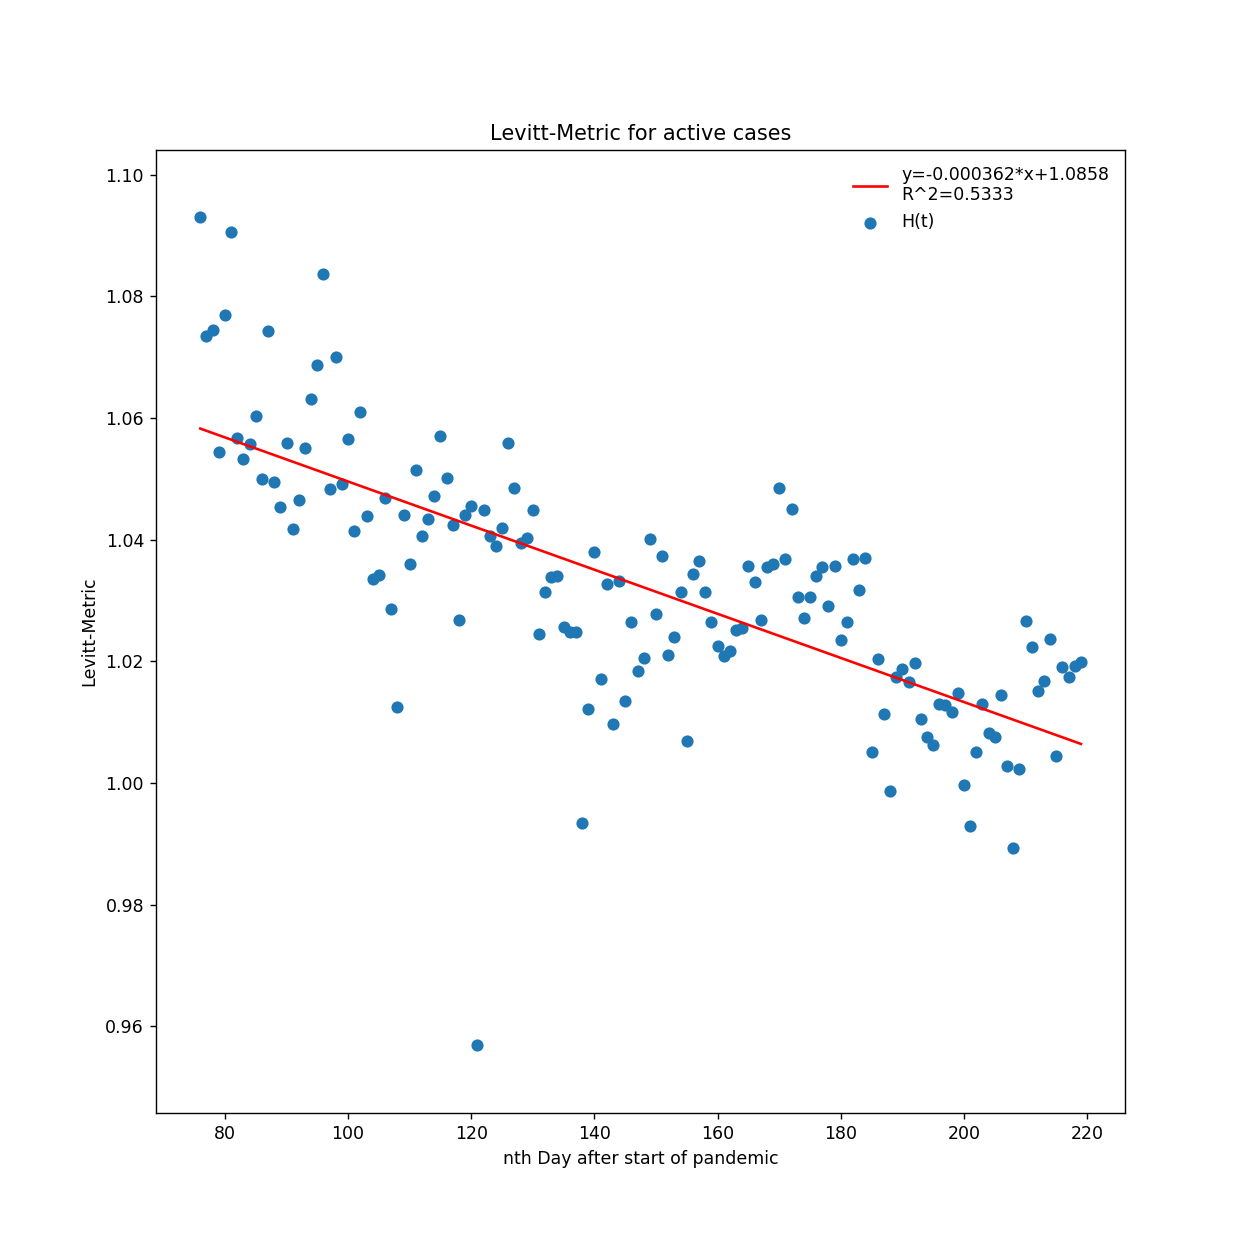

Pandemic will end in another 18 days!!!


In [11]:
#Create a separate df
actcase = nation1.copy(deep=True)
act0 = 0
active = []
for i in range(len(actcase)):
    act0 += actcase['Daily Confirmed'][i]-actcase['Daily Recovered'][i]-actcase['Daily Deceased'][i]
    active.append(act0)
actcase['Active'] = active
levact = [0]
for i in range(len(actcase)-1):
    levact.append(actcase['Active'][i+1]/actcase['Active'][i])
actcase['LevittActive'] = levact
actcase['LevittActive'].dropna()
actcase = actcase[75:]
actcase = actcase.reset_index()

#Split into X and y data and fit a regression model
Xactive = actcase['day'].to_numpy().reshape(-1,1)
yactive = actcase['LevittActive'].to_numpy().reshape(-1,1)
linreg3 = LinearRegression().fit(Xactive,yactive)

#Plot the model
fig5 = plt.figure(figsize=(10,10))
plt.scatter(Xactive,yactive,label='H(t)')
plt.plot(Xactive,linreg3.coef_*Xactive+linreg3.intercept_,'r-',
         label='y={:.6f}*x+{:.4f}\nR^2={:.4f}'.format(linreg3.coef_[0][0],linreg3.intercept_[0],linreg3.score(Xactive,yactive)))
plt.xlabel('nth Day after start of pandemic');
plt.ylabel('Levitt-Metric');
plt.title('Levitt-Metric for active cases');
plt.legend(frameon=False);

#Predict end of Pandemic
end3 = (1-linreg3.intercept_)/linreg3.coef_
end3 = np.round(end3)
#print(end3)
print("Pandemic will end in another {} days!!!".format(int(end3[0]-actcase['day'][len(actcase)-1])))